In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

* three species: E, R, and A
* their concentration are noted e, r, and a
* we have constant mass density and each specie as the same mass: volume = mass = E + R + A

In [2]:
params = {'sigma':1, 'k':2.5, 'a_sat':0.01, 'beta':0.1}

In [3]:
def derivs(t, y):
    # y[0] = E, y[1] = R, y[2] = A
    V = sum(y) # cell volume or mass
    E,R,A = y
    a = A/V # concentration of precursors 
    total_prot_synth = params['sigma'] * R * a / (a + params['a_sat']) # rate of total protein synthesis
    dA_dt = params['k'] * E - total_prot_synth # fraction beta of total synthesis allocated to E proteins (metabolism)
    dE_dt = params['beta'] * total_prot_synth # fraction (1-beta) allocated to R proteins (ribosomes)
    dR_dt = (1-params['beta']) * total_prot_synth
    dy_dt = np.array([dE_dt, dR_dt, dA_dt])
    return dy_dt

In [4]:
y0 = np.array([25,25,0])

In [5]:
ode_result = integrate.solve_ivp(derivs, (0,20), y0, dense_output=True, rtol=1e-6, atol=1e-9)

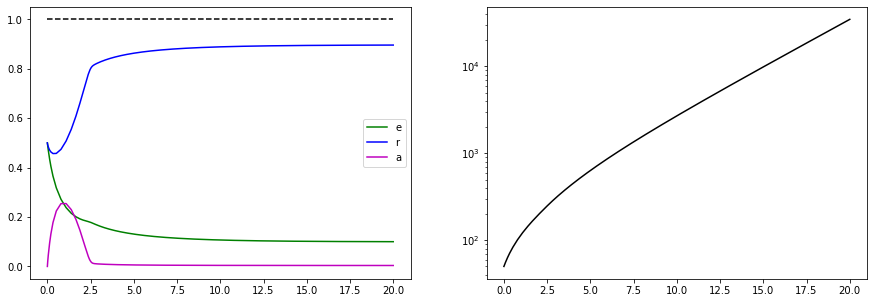

In [8]:
# Plotting the result of the ODE simulation. 
# We verify that the concentrations always sum to 1
# 
E,R,A = ode_result.y
V = E + R + A
e, r, a = E/V, R/V, A/V
t = ode_result.t
f, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
ax1.plot(t, e, 'g', label='e')
ax1.plot(t, r, 'b', label='r')
ax1.plot(t, a, 'm', label='a')
ax1.plot(t, e + r + a, '--k')
ax1.legend()
ax2.semilogy(t, V, 'k')

In [7]:
growth_rate_empirical = np.polyfit(t[-5:], np.log(V[-5:]), 1)[0]
growth_rate_expected = params['k'] * e[-1]
print(f'we measure a growth rate of {growth_rate_empirical}, we expect {growth_rate_expected}')

we measure a growth rate of 0.250525787382929, we expect 0.25047338912522626
